In [15]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\grego\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import string
import gensim

from wordcloud import WordCloud

from tqdm import tqdm
tqdm.pandas()

# Read the Dataset

In [2]:
df = pd.read_csv('../dataset/movie.csv')
df = df.loc[:5000]
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.strip()
print(df['label'].value_counts())
df.head()

label
0    2582
1    2419
Name: count, dtype: int64


,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# Preprocess

In [5]:
def remove_punctuation(text):
    return [i for i in text if i not in string.punctuation]

def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

def stemming(text):
    ps = PorterStemmer()
    stem_text = [ps.stem(word) for word in text]
    return stem_text

def lemmatizer(text):
    wnl = WordNetLemmatizer()
    lemm_text = [wnl.lemmatize(word) for word in text]
    return lemm_text

def preprocess_text(text,stop_words):
    proc = remove_numbers(text)
    proc = word_tokenize(proc)
    proc = stemming(proc)
    proc = lemmatizer(proc)
    proc = [i for i in proc if not i in stop_words]
    proc = remove_punctuation(proc)
    return proc

df['tokens'] = df['text'].progress_apply(preprocess_text,args=(stop_words,))
df.head()

100%|██████████| 5001/5001 [00:40<00:00, 124.28it/s]


,text,label,tokens
0,i grew up (b. 1965) watching and loving the th...,0,"[grew, b, watch, love, thunderbird, mate, scho..."
1,"when i put this movie in my dvd player, and sa...",0,"[put, thi, movi, dvd, player, sat, coke, chip,..."
2,why do people who do not know what a particula...,0,"[whi, peopl, know, particular, time, past, wa,..."
3,even though i have great interest in biblical ...,0,"[even, though, great, interest, biblic, movi, ..."
4,im a die hard dads army fan and nothing will e...,1,"[im, die, hard, dad, armi, fan, noth, ever, ch..."


In [6]:
df['tokens_gensim'] = df['text'].progress_apply(gensim.utils.simple_preprocess)
df.head()

100%|██████████| 5001/5001 [00:01<00:00, 4268.13it/s]


,text,label,tokens,tokens_gensim
0,i grew up (b. 1965) watching and loving the th...,0,"[grew, b, watch, love, thunderbird, mate, scho...","[grew, up, watching, and, loving, the, thunder..."
1,"when i put this movie in my dvd player, and sa...",0,"[put, thi, movi, dvd, player, sat, coke, chip,...","[when, put, this, movie, in, my, dvd, player, ..."
2,why do people who do not know what a particula...,0,"[whi, peopl, know, particular, time, past, wa,...","[why, do, people, who, do, not, know, what, pa..."
3,even though i have great interest in biblical ...,0,"[even, though, great, interest, biblic, movi, ...","[even, though, have, great, interest, in, bibl..."
4,im a die hard dads army fan and nothing will e...,1,"[im, die, hard, dad, armi, fan, noth, ever, ch...","[im, die, hard, dads, army, fan, and, nothing,..."


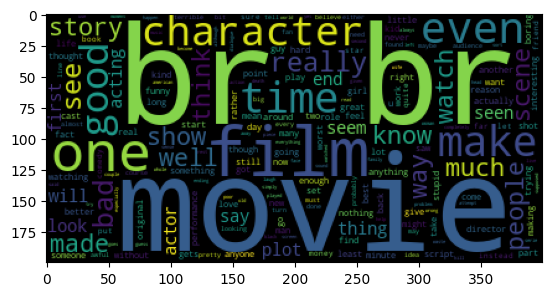

In [7]:
wc = WordCloud().generate(' '.join(df.loc[df['label']==0,'text']))
plt.imshow(wc)

In [7]:
token_list = []
for i in df.loc[df['label']==0,'tokens_gensim']:
    token_list.extend(i) 

In [8]:
len(token_list)

565758

In [45]:
a = list(stop_words)
a.append('br')

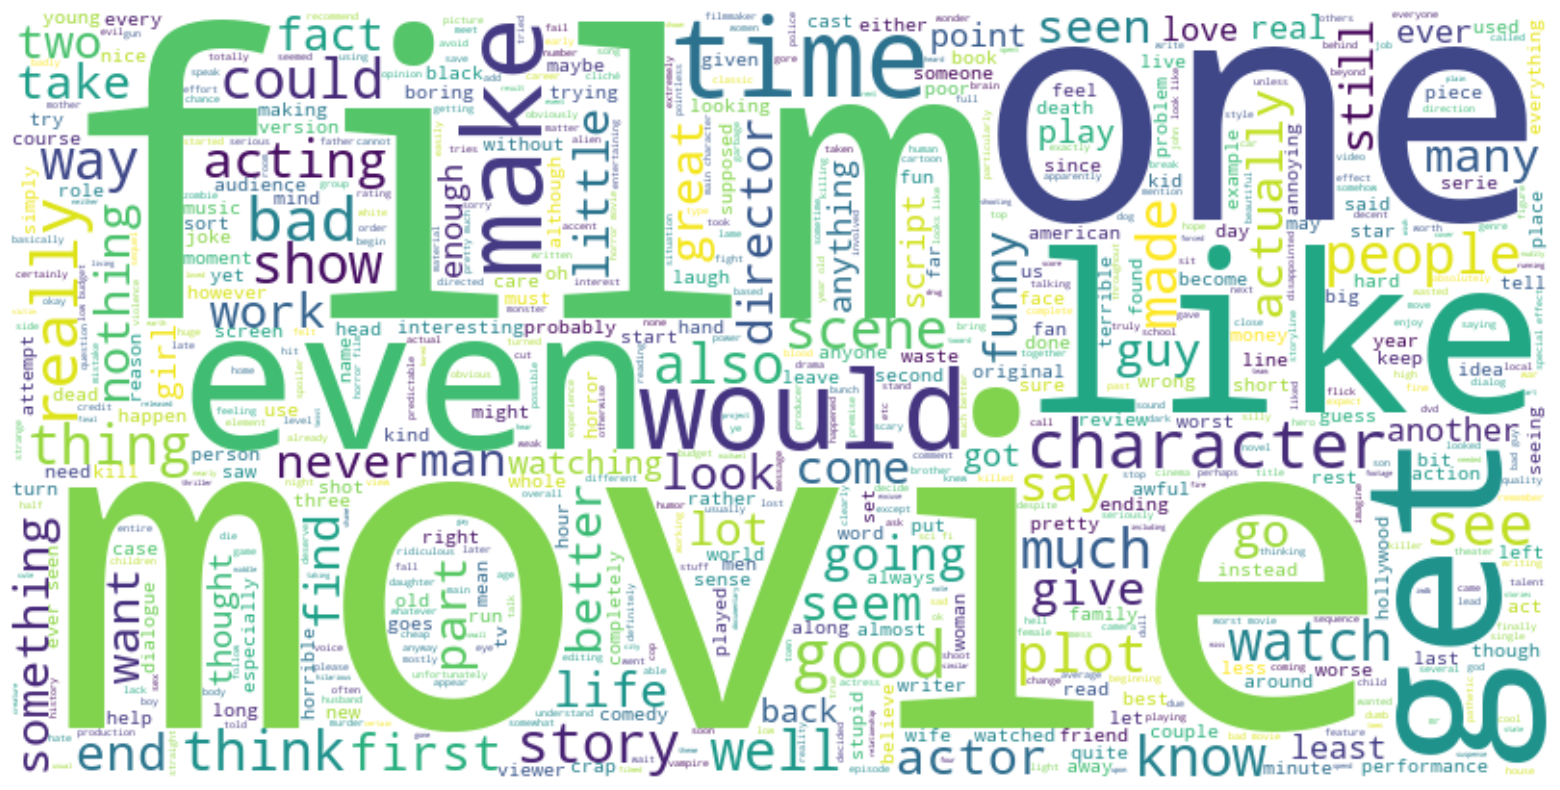

In [50]:
wc = WordCloud(width=800, height=400,background_color="white",max_words=1000,stopwords=a).generate_from_text(' '.join(token_list))
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

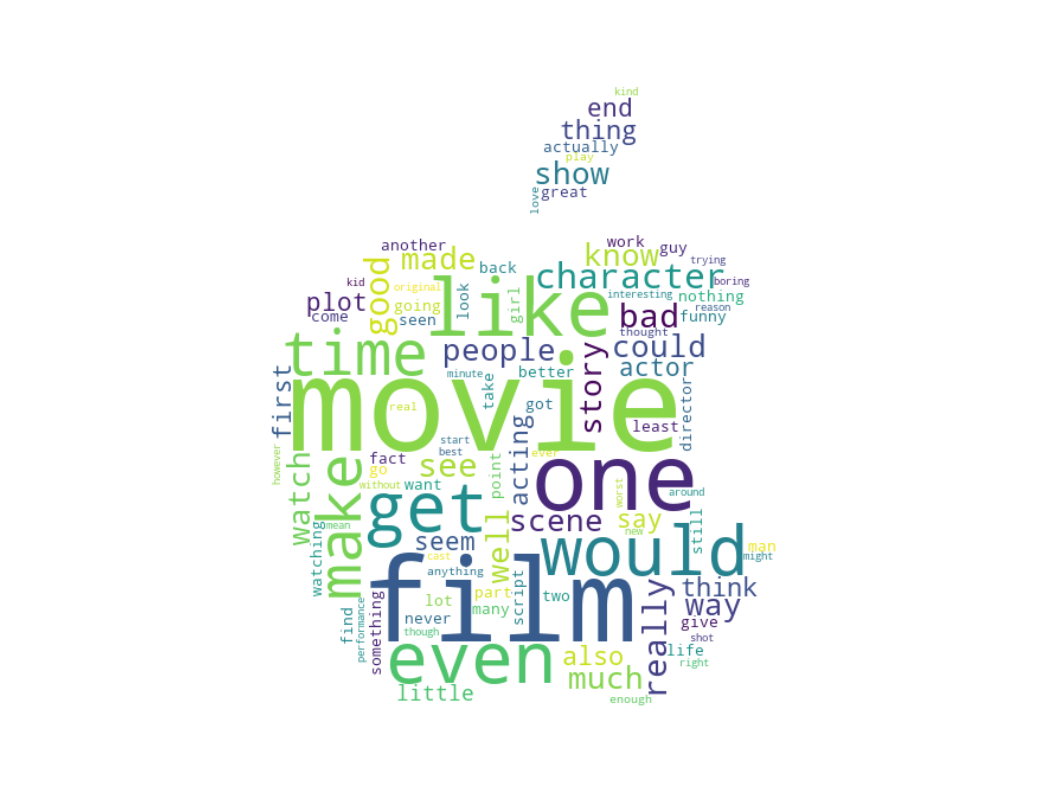

In [71]:
from PIL import Image
mask = np.array(Image.open('../apple-black8038.jpg'))

wc = WordCloud(background_color="white",max_words=100,stopwords=a,mask=mask,contour_width = 2,
     contour_color = 'white',width=800, height=400).generate_from_text(' '.join(token_list))
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis Model With PyTorch

In [19]:
from torch import nn
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
import spacy
import torch.optim as optim
import torch
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

seed = 1234

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [20]:
nlp = spacy.load('en_core_web_sm')

In [32]:
df['x'] = df['tokens_gensim'].apply(lambda x:" ".join(x))

In [49]:
x = df['x']
y = df['label']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = seed)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.25,random_state = seed)

In [64]:
Vectorizer = CountVectorizer()
X_train_vec = Vectorizer.fit_transform(x_train).toarray()
X_val_vec = Vectorizer.transform(x_val).toarray()
X_test_vec = Vectorizer.transform(x_test).toarray()

In [65]:
X_train_vec.shape

(3000, 29879)

In [39]:
num_vocab = len(Vectorizer.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in x_train])

print("Vocab size: ", num_vocab)
print("Max sentence length: ", max_sen_len)

Vocab size:  29879
Max sentence length:  1282


In [72]:
class SentimentModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text, text_lengths):
        embedded = self.embedding(text)
        packed_output, (hidden, cell) = self.rnn(embedded)
        output = self.fc(hidden[-1])
        output = torch.nn.functional.sigmoid(output)
        return output

In [73]:
model = SentimentModel(vocab_size=num_vocab,embedding_dim=100,hidden_dim=64,output_dim=1)

In [74]:
torch.from_numpy(X_test_vec)[0]
len(X_test_vec[0])

29879

In [75]:
model(torch.from_numpy(X_test_vec)[0],torch.Tensor(len(X_test_vec[0])))

tensor([0.5153], grad_fn=<SigmoidBackward0>)